This tutorial is made on my attempt to learn how to use the library qutip. It is not complete, and sometimes not completely correct. Any question can be asked to marco.scigliuzzo.physics(at)gmail.com

## Importing the important libraries

In [17]:
import numpy as np #for number handling 
import matplotlib.pyplot as plt #for plotting
import qutip as qt #for quantum simulations

The software used in this tutorial is:

In [18]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.5.0
Numpy,1.16.5
SciPy,1.3.1
matplotlib,3.1.1
Cython,0.29.13
Number of CPUs,4
BLAS Info,INTEL MKL
IPython,7.8.0
Python,"3.7.4 (default, Aug 9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]"
OS,nt [win32]


## Master equation for Jaynes-Cumming Hamiltonian and lossy atom cavity

Let's try to solve some dynamics of a two levels atom with frequency $\omega_a$, and loss rate $\gamma$, coupled with $g$ to a cavity with with frequency $\omega_c$ and total loss rate $\kappa$. 

The hamiltonian in the rotating wave approximation is:
$$H=\frac{1}{2}\hbar\omega_a\hat\sigma_z+\hbar\omega_c a^\dagger a +\hbar g (\sigma^+a+\sigma^-a^\dagger)$$

The general form for the Lindblat super-operator (dissipator) is:
$$D[O](\rho)=O\rho O^\dagger-\frac{1}{2}(O^\dagger O\rho +\rho O^\dagger O)$$

So dissipator for the atom losses is:
$$D[\sigma^\pm]\rho=\sigma^\pm\rho \sigma^\mp-\frac{1}{2}(\sigma^\mp \sigma^\pm\rho +\rho \sigma^\mp \sigma^\pm)$$

And the one for the cavity losses is:
$$D[a](\rho)=a\rho a^\dagger-\frac{1}{2}(a^\dagger a\rho +\rho a^\dagger a)$$

If the the temperature is not zero and the cavity has a population $n_{th}$, would like to solve the master equation:
$$\dot\rho=-\frac{i}{\hbar}[H,\rho]+\gamma D[\sigma^+]\rho+(1+n_{th})\kappa D[a]\rho+n_{th}\kappa D[a^\dagger]\rho$$
with some initial state for the cavity and atom.

### Define the physical variables

In [70]:
#Physical constant
h=6.62*1e-34 #Plank's constant
T=3.0e-2 #Cryostat's temperature
kB=1.38e-23 #Boltzmann constanst

#atom and cavity variables
omega_a=2*np.pi*4e9 #atom frequency 
omega_c=2*np.pi*6e9 #cavity bare frequency
gamma=2*np.pi*0.1e6 #atom non radiative decay
kappa=2*np.pi*0.5e6 #cavity radiative decay
g=2*np.pi*50e6 #atom-cavity coupling

#derived variables
n_th=1/(np.exp(h*omega_c/(2*np.pi*kB*T))-1)

### Define computational variables

In [37]:
Nc_fock=10 #number of cavity fock states
Na_fock=2 #number of atom states

### Define Hilbert space 

In [78]:
qa=qt.fock(Na_fock, 1) #define a 2 dimensional fock state with the first occupied (levels start from 0)
qc=qt.fock(Nc_fock,0) #define a 10 states vector for the cavity representation

psi0= qt.tensor(qa,qc) #tensor product for total Hilbert space

### Define Operators

In [79]:
#atom operators
sm_a=qt.destroy(Na_fock) #sigma minus
sp_a=sm.dag() #sigma plus (conjugate of sigma minus)
Ia=qt.qeye(Na_fock) #2D identity 

#cavity operators
a_c=qt.destroy(Nc_fock)
Ic=qt.qeye(Nc_fock) #cavity identity 

#full hilbert space operators
a  = qt.tensor(Ia, a_c)
sm = qt.tensor(sm_a, Ic)

#Hamiltonian
H = h/(2*np.pi) *((omega_c* a.dag() * a + omega_a * sm.dag() * sm + g * (a.dag() * sm + a * sm.dag())))

#Dissipator
dissipator=[] #define an empty list that will contain all the dissipation terms
dissipator.append(np.sqrt((1+n_th)*kappa)*a)
dissipator.append(np.sqrt(n_th*kappa)*a.dag())
dissipator.append(np.sqrt(gamma)*sm)

### Equation solution

In [84]:
times=np.linspace(0,25e-6, 100)

output = qt.mesolve(H, psi0, times, dissipator, [a.dag() * a, sm.dag() * sm])

## Results Plotting

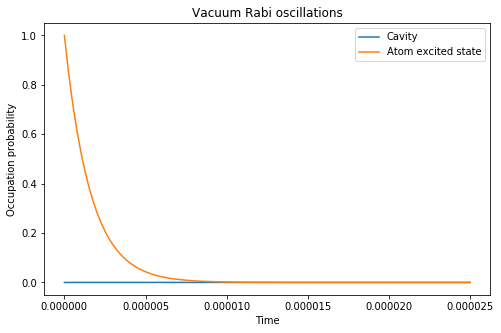

In [85]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(times, output.expect[0], label="Cavity")
ax.plot(times, output.expect[1], label="Atom excited state")
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Occupation probability')
ax.set_title('Vacuum Rabi oscillations');

### Additional notes

The following commands may help during the programming:

In [73]:
dissipator.type #print the type of the quantum object

AttributeError: 'list' object has no attribute 'type'

In [72]:
dissipator.full() #matrix representation


AttributeError: 'list' object has no attribute 'full'

In [62]:
a.dims

[[2, 10], [2, 10]]

In [63]:
sm.dims

[[2, 10], [2, 10]]